# **Imgage Clssification Image recognition**
1) Creating a deep learning model for classifying kidney conditions (stone, cyst, normal, tumor).
2) Using Convolutional Neural Networks (CNNs) with architectures like VGG16 and MobileNet is a great approach, especially when working with medical imaging data.
3) For further learning about these models, you can explore relevant websites and resources.
    * [CNN](http://https://www.tensorflow.org/tutorials/images/cnn)
    * [VGG16](http://https://datagen.tech/guides/computer-vision/vgg16)
    * [MobileNet](http://https://builtin.com/machine-learning/mobilenet)
4) Data is available on kaggle kidney data.

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
# import cv2
from tensorflow.keras.preprocessing import image
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
 

from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Model,Sequential
 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D

2024-11-18 19:23:16.391862: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731957796.467265   38732 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731957796.487703   38732 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-18 19:23:16.657953: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


**Defining size**

In [3]:
batch_size = 32
img_height = 150
img_width = 150
# %pwd

# Loading Data

In [ ]:
data_dir='CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'
# 'tf.keras.preprocessing.image.ImageDataGenerator'
# tf.keras.preprocessing.image_dataset_from_directory
train=tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                image_size=(img_height,img_width),
                                                validation_split=0.1,
                                                subset='training',
                                                seed=123,
                                                batch_size=batch_size)
val=tf.keras.utils.image_dataset_from_directory(data_dir,
                                                image_size=(img_height,img_width),
                                                validation_split=0.2,
                                                subset='validation',
                                                seed=123)

Found 12446 files belonging to 4 classes.
Using 11202 files for training.


I0000 00:00:1731957810.479257   38732 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4080 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:09:00.0, compute capability: 7.5


Found 12446 files belonging to 4 classes.
Using 2489 files for validation.


**Labels**

In [5]:
class_names = train.class_names
print(class_names)

['Cyst', 'Normal', 'Stone', 'Tumor']


In [6]:
label_to_class_name = dict(zip(range(len(train.class_names)), train.class_names))
label_to_class_name

{0: 'Cyst', 1: 'Normal', 2: 'Stone', 3: 'Tumor'}

**Size**

In [7]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


# Images

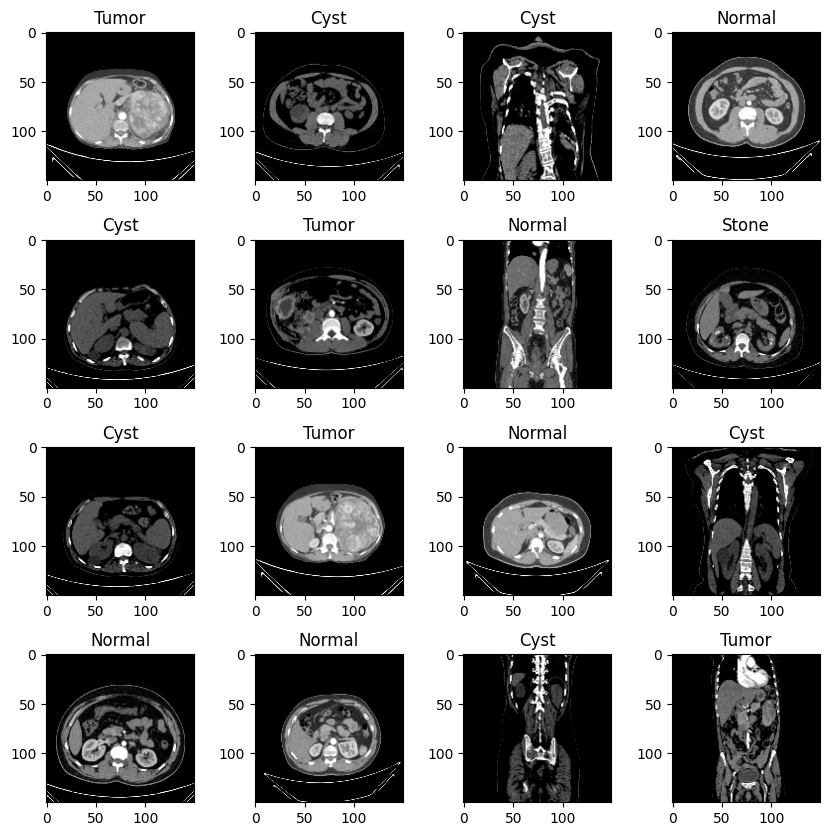

In [8]:
data_iterator = train.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i in range(4):  
    for j in range(4):  
        index = i * 4 + j  
        ax[i, j].imshow(batch[0][index].astype(int))
        ax[i, j].set_title(label_to_class_name[batch[1][index]])
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

**Data preprocessing**

In [9]:
train=train.map(lambda x,y:(x/255,y))
val=val.map(lambda x,y:(x/255,y))

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().prefetch(buffer_size=AUTOTUNE)
val = val.cache().prefetch(buffer_size=AUTOTUNE)

# Training Models

## 01) **CNN Model**

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

/home/datas/pyenvs/ds1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
epochs=15
history = model.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/15


I0000 00:00:1731951159.126407   27859 service.cc:145] XLA service 0x7fda70006360 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731951159.126721   27859 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2024-11-18 17:32:39.299556: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-18 17:32:39.913175: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
2024-11-18 17:32:42.530077: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng4{k11=1} for conv (f32[32,32,74,74]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,72,72]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[]

 11/351 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.3626 - loss: 1.6651

I0000 00:00:1731951165.293748   27859 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


351/351 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.8341 - loss: 0.4503 - val_accuracy: 0.9896 - val_loss: 0.0295
Epoch 2/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 1.2585e-04
Epoch 3/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 1.0000 - loss: 8.4762e-05 - val_accuracy: 1.0000 - val_loss: 6.3349e-05
Epoch 4/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 1.0000 - loss: 4.2886e-05 - val_accuracy: 1.0000 - val_loss: 3.8908e-05
Epoch 5/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 1.0000 - loss: 2.6131e-05 - val_accuracy: 1.0000 - val_loss: 2.6128e-05
Epoch 6/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 1.0000 - loss: 1.7354e-05 - val_accuracy: 1.0000 - val_loss: 1.8610e-05
Epoch 7/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 1.0000 - loss: 1.2187e-05 - val_accuracy: 1.0000 - val_loss: 1.3769e-05
Epoch 8/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy

**Ploting Loss and Accuracy**

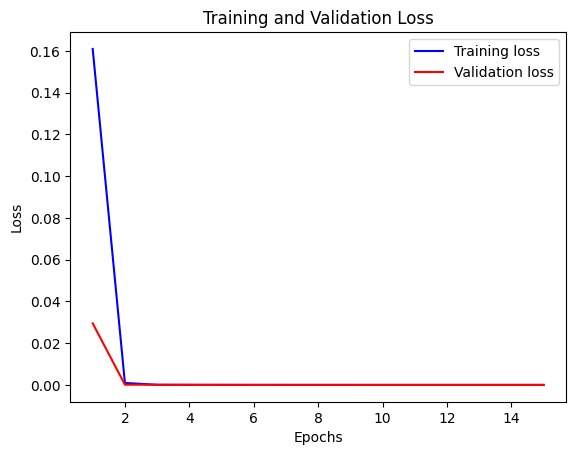

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

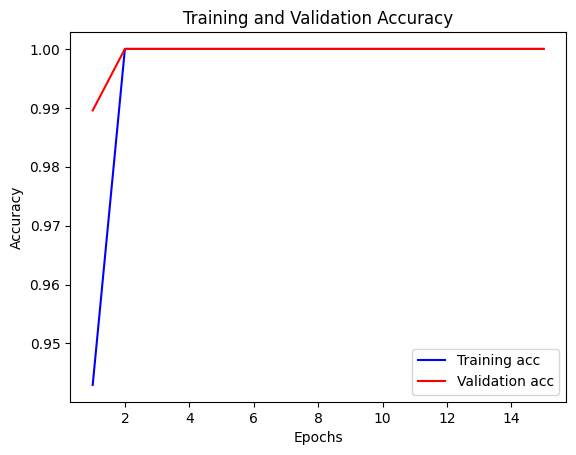

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Prediction**

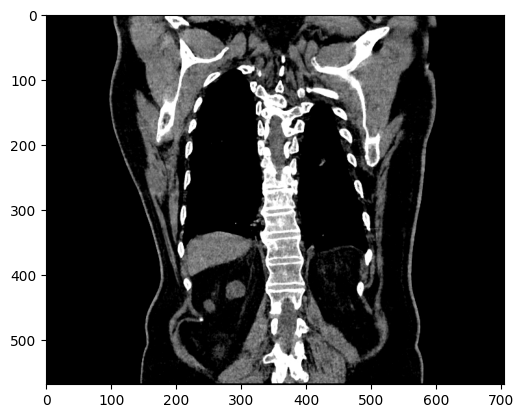

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


'Cyst'

In [ ]:
img = image.load_img('CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = model.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

## 02) **VGG16 Model**

In [11]:
VGG_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(150,150,3),
                   pooling='max',classes=4,
                   weights='imagenet')


VGG_model.add(pretrained_model)
VGG_model.add(Flatten())
VGG_model.add(Dense(512, activation='relu'))
VGG_model.add(BatchNormalization())  # Batch Normalization layer
VGG_model.add(Dropout(0.5))

VGG_model.add(Dense(4, activation='softmax'))
pretrained_model.trainable=False

In [12]:
VGG_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
VGG_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 512)            │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,981,444 (57.15 MB)

 Trainable params: 265,732 (1.01 MB)

 Non-trainable params: 14,715,712 (56.14 MB)

In [ ]:
epochs=15
history = VGG_model.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/15


I0000 00:00:1731957867.519661   38844 service.cc:148] XLA service 0x7fe0b000fda0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731957867.520997   38844 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2024-11-18 19:24:27.836161: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731957868.127948   38844 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-18 19:24:28.927110: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,64,150,150]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,150,150]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backen

350/351 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.7125 - loss: 0.7617

2024-11-18 19:25:21.491373: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[2,128,75,75]{3,2,1,0}, u8[0]{0}) custom-call(f32[2,64,75,75]{3,2,1,0}, f32[128,64,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2024-11-18 19:25:21.708855: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[2,128,75,75]{3,2,1,0}, u8[0]{0}) custom-call(f32[2,128,75,75]{3,2,1,0}, f32[128,128,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActiv

351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.7128 - loss: 0.7609

2024-11-18 19:25:35.356064: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[25,64,150,150]{3,2,1,0}, u8[0]{0}) custom-call(f32[25,3,150,150]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2024-11-18 19:25:35.471641: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[25,64,150,150]{3,2,1,0}, u8[0]{0}) custom-call(f32[25,64,150,150]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasAct

351/351 ━━━━━━━━━━━━━━━━━━━━ 75s 186ms/step - accuracy: 0.7130 - loss: 0.7602 - val_accuracy: 0.8984 - val_loss: 0.2698
Epoch 2/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 50s 143ms/step - accuracy: 0.9076 - loss: 0.2641 - val_accuracy: 0.8927 - val_loss: 0.2753
Epoch 3/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 51s 146ms/step - accuracy: 0.9320 - loss: 0.1840 - val_accuracy: 0.9562 - val_loss: 0.1298
Epoch 4/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 52s 148ms/step - accuracy: 0.9440 - loss: 0.1489 - val_accuracy: 0.9405 - val_loss: 0.1454
Epoch 5/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 51s 145ms/step - accuracy: 0.9505 - loss: 0.1343 - val_accuracy: 0.9715 - val_loss: 0.0792
Epoch 6/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 51s 146ms/step - accuracy: 0.9626 - loss: 0.1031 - val_accuracy: 0.9554 - val_loss: 0.1239
Epoch 7/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 50s 142ms/step - accuracy: 0.9645 - loss: 0.1039 - val_accuracy: 0.9719 - val_loss: 0.0819
Epoch 8/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 51s 145ms/step - accuracy: 0.9641 - loss: 0.1057 - val

**Ploting Loss and Accuracy**

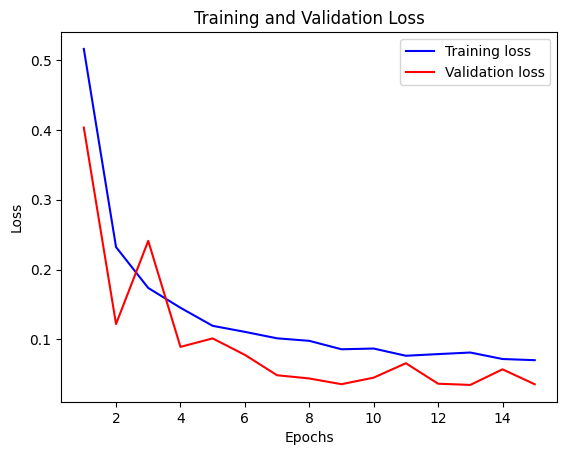

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

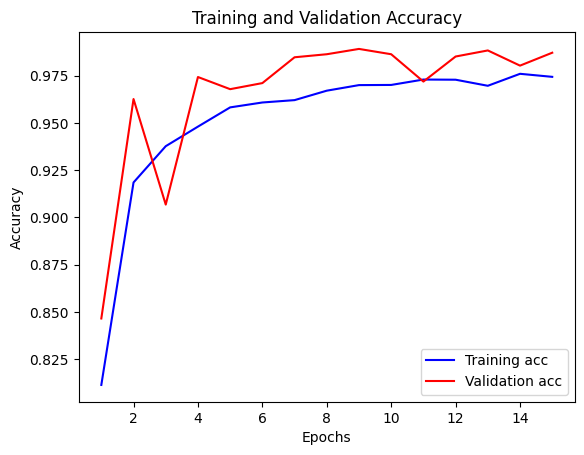

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

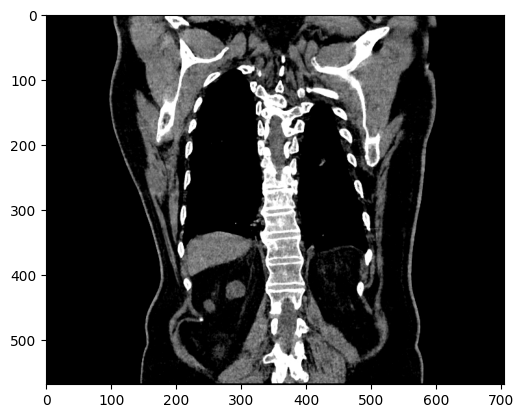

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


'Cyst'

In [ ]:
img = image.load_img('CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = VGG_model.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

## 03) **MobileNet Model**

In [25]:
mobile_net = Sequential()

pretrained_model= tf.keras.applications.MobileNetV2(include_top=False,
                   input_shape=(150,150,3),
                   pooling='max',classes=4,
                   weights='imagenet')


mobile_net.add(pretrained_model)
mobile_net.add(Flatten())
mobile_net.add(Dense(512, activation='relu'))
mobile_net.add(BatchNormalization())  # Batch Normalization layer
mobile_net.add(Dropout(0.5))

mobile_net.add(Dense(4, activation='softmax'))
pretrained_model.trainable=False

/tmp/ipykernel_27444/3112877574.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  pretrained_model= tf.keras.applications.MobileNetV2(include_top=False,


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
mobile_net.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
mobile_net.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1280)           │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,917,956 (11.13 MB)

 Trainable params: 658,948 (2.51 MB)

 Non-trainable params: 2,259,008 (8.62 MB)

In [28]:
epochs=3
history = mobile_net.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/3
351/351 ━━━━━━━━━━━━━━━━━━━━ 29s 50ms/step - accuracy: 0.7543 - loss: 0.6987 - val_accuracy: 0.9204 - val_loss: 0.2197
Epoch 2/3
351/351 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9427 - loss: 0.1743 - val_accuracy: 0.9819 - val_loss: 0.0627
Epoch 3/3
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9687 - loss: 0.1008 - val_accuracy: 0.9835 - val_loss: 0.0503


**Ploting Loss and Accuracy**

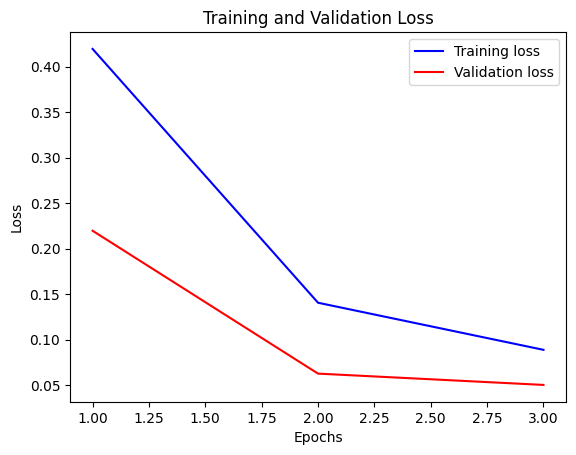

In [29]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

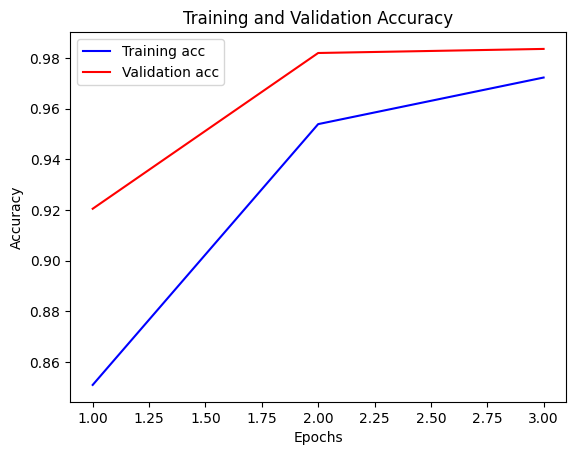

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

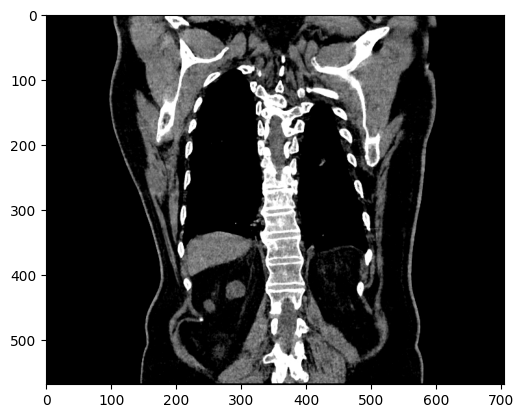

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


'Cyst'

In [ ]:
img = image.load_img('CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = mobile_net.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

**From the visual representation in the above graphs, a compelling pattern emerges, demonstrating MobileNet's superior performance compared to both CNN and VGG16. Notably, CNN exhibits clear signs of overfitting, where the model has essentially memorized the training data to an extent that its generalization capability is severely compromised. Conversely, VGG16 appears to suffer from underfitting, indicating that it may not have captured the underlying complexities of the data, leading to a less optimal model performance.**

**MobileNet, on the other hand, stands out as the most balanced and effective option. Its capacity to generalize well to unseen data while maintaining robust performance on the training data makes it a promising choice for this particular task. These insights from the graphical representations underscore the importance of model selection and the significance of striking a balance between underfitting and overfitting, ultimately contributing to the successful deployment of deep learning models in practical applications**

# Saving Model

In [32]:
mobile_net.save("model.h5")

In [34]:
loaded_model = tf.keras.models.load_model("model.h5")

# Testing Model

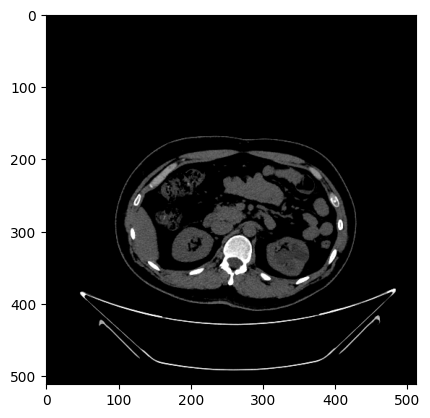

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


'Cyst'

In [ ]:
img = image.load_img('CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1000).jpg')

plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = loaded_model.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

### FIN